# Predicting Heart Disease

Heart disease, also known as cardiovascular disease (CVD), encompasses a range of conditions that affect the heart and blood vessels. It is a leading cause of death worldwide, accounting for millions of deaths each year. Understanding heart disease, its risk factors, and prevention strategies is crucial for maintaining good heart health.

In [1]:
#import libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
heart_disease = pd.read_csv('heart.csv')

#view first 5 rows
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Understanding the columns

Age: age of the patient

Sex: is the patient male or female; 1-male, 0-female

Cp(Chest pain):This typically refers to the presence or absence of chest pain and may be categorized based on its characteristics

-typical angina:0; refers to chest pain that exhibits classic. It is typically triggered by physical exertion or emotional stress and is relieved by rest or nitroglycerin. Typical angina is considered a warning sign of potential heart problems, such as coronary artery disease.

-atypical angina:1;  Atypical angina is often associated with other conditions or causes of chest pain, making it more challenging to diagnose as a cardiac issue.

-non-anginal:2; Non-anginal chest pain can be caused by various factors unrelated to the heart, such as muscle strain, gastrointestinal issues, or anxiety.

-asymptomatic:3; means the absence of symptoms. In the context of heart disease, it indicates that a person is not experiencing any chest pain, discomfort, or other cardiac symptoms.

trestbps: Resting blood pressure usually expressed in millimeters of mercury (mm Hg)

chol(Serum Cholesterol): This represents the level of cholesterol in the blood, often measured in milligrams per deciliter (mg/dL).

fbs (Fasting Blood Sugar): This measures the blood sugar (glucose) level after a period of fasting, typically expressed in mg/dL. It is used to assess diabetes risk. if fbs>120mm/hg

no fbs - 0

fbs - 1

Restecg (Resting Electrocardiographic Results): This likely indicates the results of an electrocardiogram (ECG or EKG) taken at rest, which records the electrical activity of the heart.

normal - 0

stt abnormality -1

lv hypertrophy - 2

Thalach (Maximum Heart Rate Achieved): This refers to the highest heart rate recorded during a specific activity or test, often measured in beats per minute (bpm).

Exang (Exercise-Induced Angina): This may indicate whether angina (chest pain) is induced during exercise as part of a diagnostic test like a stress test.

True -1

False - 0

Oldpeak (ST Depression Induced by Exercise): This measures the extent of ST-segment depression on an ECG during exercise, which can be indicative of myocardial ischemia (reduced blood flow to the heart muscle).

Slope (Slope of the Peak Exercise ST Segment): This likely describes the slope of the ST-segment on an ECG during exercise, which can provide additional information about myocardial ischemia.

downsloping -0

flat - 1

upsloping - 2

CA (Number of Major Vessels Colored by Flourosopy): This typically refers to the number of coronary arteries (blood vessels supplying the heart) that show blockages or abnormalities during a diagnostic procedure like angiography.

0: No major coronary vessels show significant blockages or abnormalities.

1: One major coronary vessel (e.g., LAD, LCx, RCA) shows significant blockage or disease.

2: Two major coronary vessels show significant blockages or disease.

3: Three major coronary vessels show significant blockages or disease.

4: All four major coronary vessels (LMCA, LAD, LCx, and RCA) show significant blockages or disease.

Thal (Thalassemia): This may represent the presence or type of thalassemia, a genetic blood disorder, and can be relevant to understanding the patient's overall health and potential complications.

 normal - 1

 fixed defect - 2

 reversible defect - 3












### Exploring the data

In [4]:
#check the number of rows and columns
heart_disease.shape

(1025, 14)

In [4]:
#check the information of the data
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
#check for duplicate entries
heart_disease[heart_disease.duplicated() == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
#drop duplicate entries
heart_disease.drop_duplicates(keep = 'first', inplace = True)

In [7]:
#check the statistics of the data
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Let's check for missing values
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#check the shape of the data again

heart_disease.shape

(302, 14)

- ### Observations

- There are 1025 rows and 14 columns in the data.

- All the columns are in numerical values.

- There are 723 duplicate entries.

- There are no missing values in the data.

- After dropping the duplicates, the dataset has 302 entries.

## Data Visualization

<AxesSubplot:>

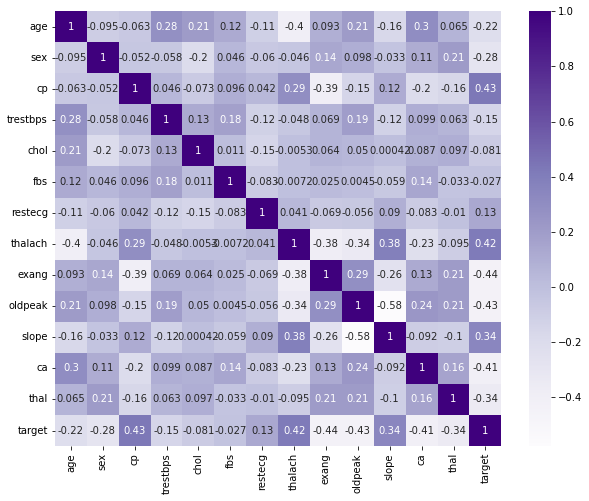

In [10]:
#Let's check the correlation between all columns

plt.figure(figsize = (10,8))
sns.heatmap(heart_disease.corr(), cmap = 'Purples', annot = True)

Questions to ask the data

- Is there a correlation between aging and an increased risk of heart disease?

- What percentages of men and women suffer from heart disease?

- Is having a particular chest pain a sign that you have heart disease?

- Does the presence of cholesterol impact heart disease?

- Is there a correlation between high blood sugar and heart disease

- What is the likelihood of acquiring heart disease if you have a general blood disorder?


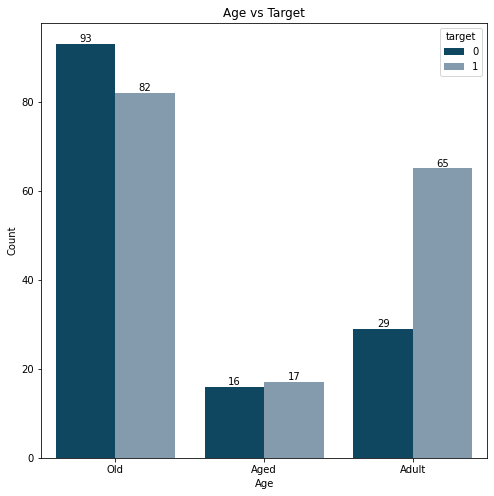

In [12]:
# - Is there a correlation between aging and an increased risk of heart disease?

# Adult: age 29 to 50

# Old: 51 to 65

# Aged: > 65


def age(Age):
  if Age<=50:
    return 'Adult'
  elif Age<=65:
    return 'Old'
  else:
    return 'Aged'

plt.figure(figsize=(8,8)) 

sns.set_palette(['#004c6d','#7d9cb5'])

heart_disease['Age_group'] = heart_disease['age'].apply(age)

ax = sns.countplot(x = 'Age_group', hue='target', data = heart_disease)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age vs Target')
plt.show()

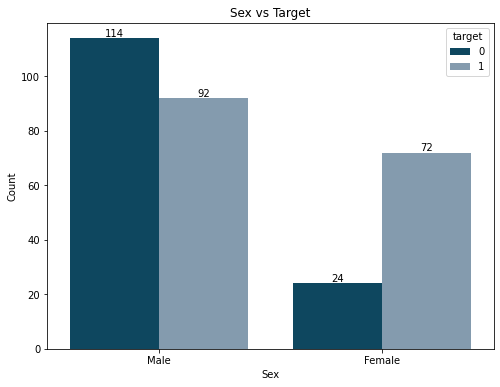

In [13]:
# What percentages of men and women suffer from heart disease?

heart_disease['sex_cat'] = heart_disease['sex'].replace(1, 'Male').replace(0,'Female')

plt.figure(figsize=(8,6)) 

sns.set_palette(['#004c6d','#7d9cb5'])

ax = sns.countplot(x = 'sex_cat', hue='target', data = heart_disease)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex vs Target')
plt.show()

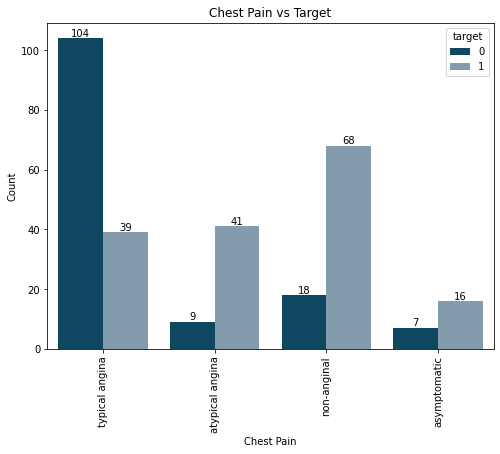

In [14]:
# Is having a particular chest pain a sign that you have heart disease?

heart_disease['cp_cat'] = heart_disease['cp'].replace({1:'atypical angina',
                                                       0:'typical angina',
                                                       2: 'non-anginal',
                                                       3: 'asymptomatic'})

plt.figure(figsize=(8,6)) 

sns.set_palette(['#004c6d','#7d9cb5'])


ax = sns.countplot(x = 'cp_cat', hue='target', data = heart_disease)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 90)
plt.xlabel('Chest Pain')
plt.ylabel('Count')
plt.title('Chest Pain vs Target')
plt.show()


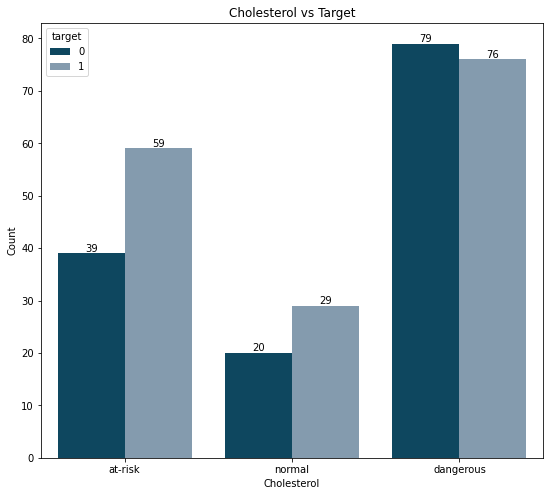

In [15]:
# Does the presence of cholesterol impact heart disease?

# normal cholesterol: less than 200

# at risk: 200 - 239

# dangerous: 240 and higher



def chol(Chol):
  if Chol < 200:
    return 'normal'
  elif Chol<= 239:
    return 'at-risk'
  else:
    return 'dangerous'

plt.figure(figsize=(9,8)) 

sns.set_palette(['#004c6d','#7d9cb5'])

heart_disease['chol_group'] = heart_disease['chol'].apply(chol)

ax = sns.countplot(x = 'chol_group', hue='target', data = heart_disease)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.title('Cholesterol vs Target')
plt.show()



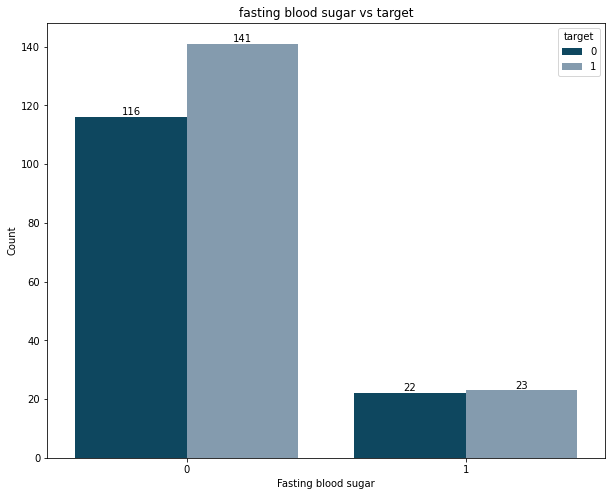

In [16]:
# Is there a correlation between high blood sugar and heart disease?

plt.figure(figsize=(10,8))    
  
sns.set_palette(['#004c6d','#7d9cb5'])

ax = sns.countplot(x = 'fbs', hue = 'target', data=heart_disease)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Fasting blood sugar')
plt.ylabel('Count')
plt.title('fasting blood sugar vs target')
plt.show()

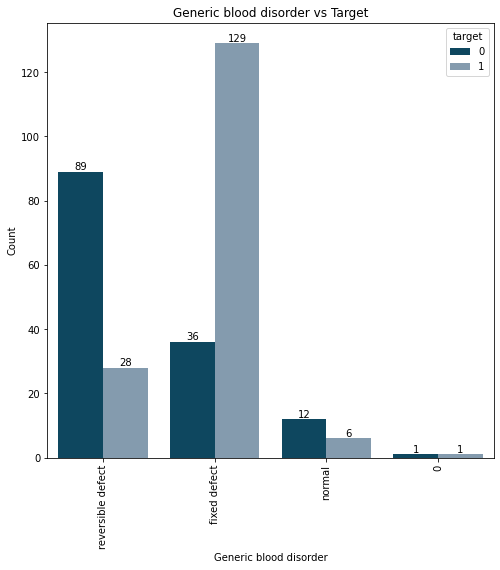

In [17]:
# What is the likelihood of acquiring heart disease if you have a general blood disorder?

#  normal - 1

#  fixed defect - 2

#  reversible defect - 3

heart_disease['thal_th'] = heart_disease['thal'].replace({1:'normal',
                                                       2: 'fixed defect',
                                                       3: 'reversible defect'})

plt.figure(figsize=(8,8)) 

sns.set_palette(['#004c6d','#7d9cb5'])


ax = sns.countplot(x = 'thal_th', hue='target', data = heart_disease)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 90)
plt.xlabel('Generic blood disorder')
plt.ylabel('Count')
plt.title('Generic blood disorder vs Target')
plt.show()


- ### Observations

### Model Training

In [18]:
#drop the column used for visualizations

heart_disease = heart_disease.drop(heart_disease.select_dtypes('object'), axis = 1)

In [19]:
#view the data again

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [20]:
# import necessary libraries

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [21]:
# split the data

X = heart_disease.drop(['target'], axis = 1)
y = heart_disease['target']

In [22]:
#split into training and testing

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=456)

#### Decision Tree

In [25]:
#instantiate the model


dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, random_state=456)

In [26]:
#fit and train the model

dt.fit(X_train,y_train)

# predict the model on test data
y_pred = dt.predict(X_test)

#print the score between test data and predicted data

dtc_score = accuracy_score(y_test, y_pred)
dtc_score


0.7704918032786885

#### Random Forest Classifier

In [29]:
#instantiate the model

rfc = RandomForestClassifier(criterion = 'entropy', random_state = 456)

In [30]:
#fit and train the model

rfc.fit(X_train, y_train)

#predict on test data

rfc_pred = rfc.predict(X_test)

#print the score between test data and predicted data

rfc_score = accuracy_score(y_test, rfc_pred)
rfc_score


0.8032786885245902

In [ ]:
feature = rfc.feature_importances_

Text(0.5, 1.0, 'Feature Importance of the model')

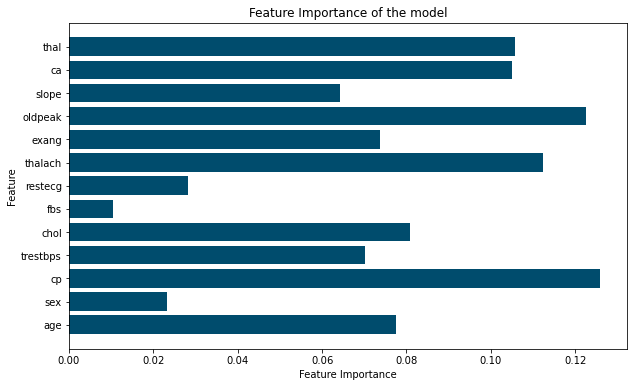

In [52]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature)), feature, tick_label=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of the model')

#### KNeighborsClassifier

In [40]:
#instantiate the model

knn = KNeighborsClassifier(n_neighbors=5)

In [41]:
#fit and train the model

knn.fit(X_train, y_train)

#predict on test data

knn_pred = knn.predict(X_test)

#print the score between test data and predicted data

knn_score = accuracy_score(y_test, knn_pred)

knn_score

0.6885245901639344

In [42]:
# print the models accuracy

pd.DataFrame({
    'Model': ['DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier'],
    'Accuracy Score': [dtc_score, rfc_score, knn_score]
})

,Model,Accuracy Score
0,DecisionTreeClassifier,0.770492
1,RandomForestClassifier,0.803279
2,KNeighborsClassifier,0.688525


Conclusion

In [49]:
import pickle
pickle.dump(rfc, open('heart_disease.pkl','wb'))